In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\HCP1.xlsx")

encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=8)

train_x = train.drop(columns=['Surface Segregation energy', 'System'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [73]:
from sklearn.metrics import r2_score
r2_score(train_y, prediction1)

0.9672968040618687

In [74]:
from sklearn.metrics import r2_score
r2_score(test_y, prediction)

0.7640642110171256

In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.17563372228729685

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.07222838644818505

In [77]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.23116189087893596


In [78]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.09369018175266354


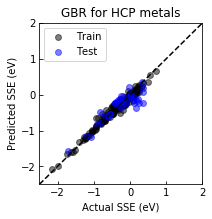

In [79]:
lineStart = test_y.min() 
lineEnd = prediction.max()  

plt.figure(figsize=(3,3))
plt.scatter(train_y, prediction1,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train')
plt.scatter(test_y,prediction,
          c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test')

plt.title('GBR for HCP metals')
plt.tight_layout()
axes = plt.gca()
axes.set_xlim([-2.5,2])
axes.set_ylim([-2.5,2])

diag_line, = axes.plot(axes.get_xlim(), axes.get_ylim(), ls="--", c="black")

axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")

plt.xlabel('Actual SSE (eV)')
plt.ylabel('Predicted SSE (eV)')
plt.legend(loc='upper left')

plt.savefig('GBR for HCP metals.png', dpi=2000)
     
            
            
            
from PIL import Image, ImageEnhance 
im = Image.open("GBR for HCP metals.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for HCP metals enhanced.png")       
           
      
            
            
            

In [81]:
df = pd.DataFrame({'Actual Surface Segregation Energy': train_y, 'Predicted Surface Segregation Energy': prediction1})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
150,-0.17,-0.286647
88,0.37,0.315559
68,-0.80,-0.827734
12,-0.62,-0.635779
174,-0.70,-0.628685
30,-1.40,-1.320334
168,-1.21,-1.200721
180,0.23,0.162777
10,-0.06,-0.037768
141,-0.28,-0.512331


In [82]:
df = pd.DataFrame({'Actual Surface Segregation Energy': test_y, 'Predicted Surface Segregation Energy': prediction})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
171,0.07,-0.142874
23,-0.33,-0.155001
99,-1.21,-1.166474
134,-0.26,-0.049540
1,-0.24,-0.375670
90,0.16,-0.381402
101,-0.31,-0.238389
158,-0.11,-0.259856
163,0.36,-0.245097
52,-0.55,-0.546633


[2.05742716e-02 3.06799422e-02 7.18074462e-03 9.60291207e-05
 1.87310639e-02 1.33265253e-02 4.19725245e-02 8.39662714e-02
 4.46811883e-02 3.78174622e-06 3.72447087e-02 2.83492936e-02
 3.22488077e-02 7.81191073e-04 5.43376528e-02 9.01637159e-02
 2.53236817e-01 1.61824336e-01 8.06011349e-02 0.00000000e+00]


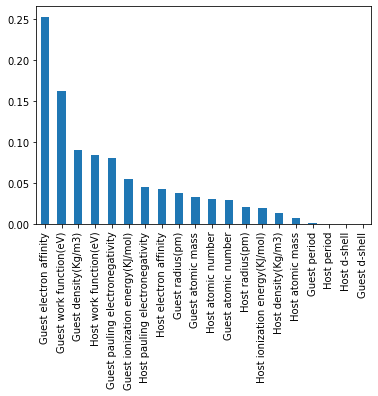

In [83]:
import pandas as pd
import numpy as np


print(est.feature_importances_) #use inbuilt class feature_importances of tree based regressors
#plot graph of feature importances for better visualization
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='bar')
plt.show()

[2.05742716e-02 3.06799422e-02 7.18074462e-03 9.60291207e-05
 1.87310639e-02 1.33265253e-02 4.19725245e-02 8.39662714e-02
 4.46811883e-02 3.78174622e-06 3.72447087e-02 2.83492936e-02
 3.22488077e-02 7.81191073e-04 5.43376528e-02 9.01637159e-02
 2.53236817e-01 1.61824336e-01 8.06011349e-02 0.00000000e+00]


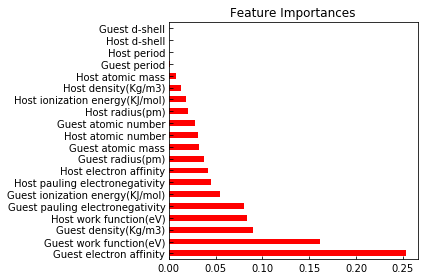

C:\Users\Damilola Ologunagba\Anaconda3\lib\site-packages\PIL\Image.py:2735: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_)
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='barh', color ="red", align="center", alpha = 1)


axes = plt.gca()
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('HCP metals feature importance.png', dpi=2000)
plt.show()

            
from PIL import Image, ImageEnhance 
im = Image.open("HCP metals feature importance.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("HCP metals feature importance enhanced.png")       
           

In [89]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.2013577045946723


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\HCP1.xlsx")

encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=9)

train_x = train.drop(columns=['Surface Segregation energy', 'System', 'enthalpy of fusion/KJ/mol', 'enthalpy of fusion/ KJ/mol', 'd-shell', 'period', 'period.1','Atomic mass', 'density/Kg/m3', 'Atomic no', 'Atomic no.1', 'electron affinity', 'Radius/pm', 'Radius/pm.1', 'density/ Kg/m3', 'ionization energy/ KJ/mol', 'Pauling electronegativity.1', 'Atomic mass.1'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System', 'enthalpy of fusion/KJ/mol', 'enthalpy of fusion/ KJ/mol', 'd-shell', 'period', 'period.1','Atomic mass', 'density/Kg/m3', 'Atomic no', 'Atomic no.1', 'electron affinity', 'Radius/pm', 'Radius/pm.1', 'density/ Kg/m3', 'ionization energy/ KJ/mol', 'Pauling electronegativity.1', 'Atomic mass.1'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)


In [10]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.29014808085576876


In [11]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.2444909533978588


In [2]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.18925074744173087

In [3]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.12600047213110144